## Numpy

`Numpy `— это библиотека для работы с матрицами. Название происходит от Numeric Python. «Под капотом» написана на C++ (это такой язык программирования, очень быстрый в умелых руках), а то, что видим в Python — это лишь «рычаги управления».

In [26]:
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print(f'Матрица:\n{a} \nразмерностью {a.shape}')

Матрица:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] 
размерностью (4, 3)


In [28]:
print(f'Матрицу можно транспонировать\n(повернуть набок:\n\n{a.T})')

Матрицу можно транспонировать
(повернуть набок:

[[ 1  4  7 10]
 [ 2  5  8 11]
 [ 3  6  9 12]])


In [29]:
# скалярные произведения матриц

np.dot(a, np.array([1, 2, 3]))

array([14, 32, 50, 68])

In [31]:
# Обычные умножения делаются поэлементно. Немного непривычно для математиков
b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
a * b

array([[  1,   4,   9],
       [ 16,  25,  36],
       [ 49,  64,  81],
       [100, 121, 144]])

In [45]:
#  матричные умножения делаются через np.dot
print(f'{a}\n\n{b.T}')
np.dot(a, b.T)


[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[[ 1  4  7 10]
 [ 2  5  8 11]
 [ 3  6  9 12]]


array([[ 14,  32,  50,  68],
       [ 32,  77, 122, 167],
       [ 50, 122, 194, 266],
       [ 68, 167, 266, 365]])

In [49]:
# размерность матрицы .shape  - X кол-во строк
print(a.shape)
print(b.shape, b.T.shape)

(4, 3)
(4, 3) (3, 4)


## Pandas

Библиотека для работы с табличными данными. Подробнее познакомимся в следующем уроке, здесь же пройдемся обзорно.

Основные компоненты pandas – `Series и DataFrame.`

`Series` – что-то вроде столбца с данными, `DataFrame` – это таблица, созданная из столбцов Series.

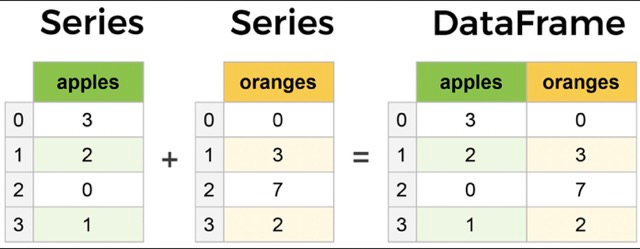

In [4]:
import pandas as pd
df = pd.DataFrame([("Python", 6), ("Python", 8), ("ML", 20)], columns=['block', 'lessons'])

df


,block,lessons
0,Python,6
1,Python,8
2,ML,20


In [28]:
df.shape[0]

3

In [6]:
# фильтрация записей
df[df.block == 'Python']
# иначе df[df['block'] == 'Python']

,block,lessons
0,Python,6
1,Python,8


In [20]:
# создаем колонки
df['#'] = range(1, df.shape[0] + 1)
df

,block,lessons,#
0,Python,6,1
1,Python,8,2
2,ML,20,3


In [19]:
# добавить строку + данные

result = []
for i in range(1, df.shape[0] + 1):
    result.append(f'cource_{i}')
df['#'] = result
df

,block,lessons,#
0,Python,6,cource_1
1,Python,8,cource_2
2,ML,20,cource_3


In [29]:
# через list compr
df['number'] = [f'cource_{i}' for i in range(1, df.shape[0] + 1)]
df

,block,lessons,#,number
0,Python,6,cource_1,cource_1
1,Python,8,cource_2,cource_2
2,ML,20,cource_3,cource_3


In [32]:
# группировка и сумма по группам
df.groupby('block').sum()

,lessons
block,
ML,20
Python,14


In [34]:
# сохранить df в файл
# df.to_csv('lesson4.csv') # с индексами 
df.to_csv('lesson4.csv', index=False) # без индексов

In [35]:
!cat lesson4.csv

block,lessons,#,number
Python,6,cource_1,cource_1
Python,8,cource_2,cource_2
ML,20,cource_3,cource_3


In [36]:
df_1 = pd.read_csv('lesson4.csv')
# df_1 = pd.read_csv('lesson4.csv', index_col = 0) # прочитать без индексов
df_1

,block,lessons,#,number
0,Python,6,cource_1,cource_1
1,Python,8,cource_2,cource_2
2,ML,20,cource_3,cource_3
